## Modelo de Aprendizaje Supervisado

### Scikit-learn (Ejercicio):

In [1]:
#Imports:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import pandas as pd

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer['data'].shape

(569, 30)

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df_cancer = pd.DataFrame(data = cancer['data'], columns= cancer['feature_names'])
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_cancer['Cancer?'] = cancer['target']
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer?
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df_cancer.describe()

#Dado los promedios tan distintos toca estandarizarlos.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer?
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df_cancer['Cancer?'].value_counts()

Cancer?
1    357
0    212
Name: count, dtype: int64

In [14]:
X = df_cancer.drop('Cancer?', axis = 1) #X = Todo el dataframe pero sin cancer
Y = df_cancer['Cancer?']

#Testeo:
# test_size=0.3 : 30% de los datos. (El dataset es muy pequeño)
#  random_state=101
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

#Escalamiento de datos
scaler = StandardScaler()
model = LogisticRegression()

#Elaboración de Pipeline con 2 tasks: El Escalado y el Modelado.

pipeline = Pipeline([('scaler', scaler),
                     ('model', model)])

In [15]:
print(f'Datos para entrenamiento: {X_train.shape}')
X_train.head()

Datos para entrenamiento: (398, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.110800,0.2827,0.09208
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.42900,0.358700,0.183400,0.3698,0.10940
514,15.050,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.286600,0.112000,0.2282,0.06954
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,0.1580,0.06235,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.093500,0.038460,0.2552,0.07920


In [16]:
print(f'Datos para testing: {X_test.shape}')
X_test.head()

Datos para testing: (171, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932


In [17]:
# Entrenamiento del modelo
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [18]:
# Evaluación del modelo
Y_test_pred = pipeline.predict(X_test)

## Matriz de Confusión

In [19]:
# Confrontación Real vs Predicción - Matriz de confusión manual
df_cancer_details = pd.DataFrame()
df_cancer_details['Real'] = Y_test
df_cancer_details['Predicción'] = Y_test_pred
df_cancer_details['Clasificacion'] = df_cancer_details.apply(
    lambda row: 'TP' if row['Real'] == 1 and row['Predicción'] == 1 else
                'FN' if row['Real'] == 1 and row['Predicción'] == 0 else
                'FP' if row['Real'] == 0 and row['Predicción'] == 1 else
                'TN',
    axis=1
)
df_cancer_details

,Real,Predicción,Clasificacion
107,1,1,TP
437,1,1,TP
195,1,1,TP
141,0,0,TN
319,1,1,TP
...,...,...,...
420,1,1,TP
279,1,1,TP
390,1,1,TP
91,0,0,TN


In [20]:
df_cancer_details['Clasificacion'].value_counts()

Clasificacion
TP    104
TN     63
FP      3
FN      1
Name: count, dtype: int64

In [48]:
# Confrontación Real vs Predicción - Matriz de confusión scikit-learn
aux = confusion_matrix(Y_test, Y_test_pred) # real v.s predicción
print(aux)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_pred).ravel()
print(f'Verdaderos Positivos (TP): {tp}', f'Falsos Negativos (FN): {fn}',
      f'Falsos Positivos (FP): {fp}', f'Verdaderos Negativos (TN): {tn}', sep='\n')

[[ 63   3]
 [  1 104]]
Verdaderos Positivos (TP): 104
Falsos Negativos (FN): 1
Falsos Positivos (FP): 3
Verdaderos Negativos (TN): 63


|                     | Predicción Positiva | Predicción Negativa |
|---------------------|---------------------|----------------------|
| **Clase Positiva**  | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| **Clase Negativa**  | Falsos Positivos (FP)     | Verdaderos Negativos (TN) |

## Estadísticos de Validación

### Exactitud (Accuracy)

La exatitud es la proporción de predicciones correctas (tanto positivas como negativas) entre el total de casos examinados se calcula con la formula: $$ \text{Exactitud} = \frac{TP + TN}{TP + FN + FP + TN} $$

In [24]:
#Calculo de Exactitud con scikit-learn:
from sklearn.metrics import accuracy_score

# y_true son las etiquetas verdaderas, y y_pred son las etiquetas predichas por el modelo
exactitud = accuracy_score(Y_test, Y_test_pred) # real v.s predicción
print(f"Exactitud (scikit-learn): {exactitud}")

Exactitud (scikit-learn): 0.9766081871345029


In [25]:
#Calculo de Exactitud Manualmente
exactitud_ = (tp + tn) / (tp + fn + fp +tn)
print(f"Exactitud (Manual): {exactitud_}")

Exactitud (Manual): 0.9766081871345029


### Precisión (Precision)

La precisión mide la proporción de predicciones positivas correctas en relación con el total de predicciones positivas. Su fórmula es:

$$ \text{Precisión} = \frac{VP}{VP + FP} $$

In [26]:
#Calculo de Precisión con scikit-learn:
from sklearn.metrics import precision_score

# y_true son las etiquetas verdaderas, y y_pred son las etiquetas predichas por el modelo
precision = precision_score(Y_test, Y_test_pred) # real v.s predicción
print(f"Precisión (scikit-learn): {precision}")

Precisión (scikit-learn): 0.9719626168224299


In [27]:
#Calculo de Precisión Manualmente
precision_ = tp  / (tp + fp)
print(f"Precisión (Manual): {precision_}") # Que tanto puedo confiar en el modelo

Precisión (Manual): 0.9719626168224299


### Sensibilidad (Recall) o Tasa de Verdaderos Positivos

La sensibilidad, también conocida como recall o tasa de verdaderos positivos, mide la proporción de positivos reales que fueron identificados correctamente por el modelo. Se calcula con: $$ \text{Sensibilidad} = \frac{VP}{VP + FN} $$

In [28]:
#Calculo de Precisión con scikit-learn:
from sklearn.metrics import recall_score

# y_true son las etiquetas verdaderas, y y_pred son las etiquetas predichas por el modelo
sensibilidad = recall_score(Y_test, Y_test_pred) # real v.s predicción
print(f"Sensibilidad (scikit-learn): {sensibilidad}")

Sensibilidad (scikit-learn): 0.9904761904761905


In [29]:
#Calculo de Sensibilidad Manualmente
sensibilidad_ = tp  / (tp + fn)
print(f"Sensibilidad (Manual): {sensibilidad_}") #Que tan eficiente es el modelo encontrando 1.

Sensibilidad (Manual): 0.9904761904761905


### Valor F1

El valor F1 es el promedio armónico de la precisión y la sensibilidad, ofreciendo un balance entre ellos. Es especialmente útil cuando las clases son desbalanceadas. Se calcula con: $$ \text{Valor F1} = 2 \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}} $$

In [30]:
#Calculo de Precisión con scikit-learn:
from sklearn.metrics import f1_score

# y_true son las etiquetas verdaderas, y y_pred son las etiquetas predichas por el modelo
valor_f1 = f1_score(Y_test, Y_test_pred) # real v.s predicción
print(f"Valor F1 (scikit-learn): {valor_f1}")

Valor F1 (scikit-learn): 0.9811320754716981


In [31]:
#Calculo de Sensibilidad Manualmente
valor_f1_ = 2* ((precision * sensibilidad)  / (precision + sensibilidad))
print(f"Valor F1 (Manual): {valor_f1_}")

Valor F1 (Manual): 0.9811320754716981


### Curva Precision-Recall y el Área Bajo la Curva (PR-AUC)

La curva Precision-Recall muestra la relación entre la precisión del modelo (su capacidad para no etiquetar como positivo un negativo) y su sensibilidad (su capacidad para encontrar todos los positivos) a lo largo de diferentes umbrales. El área bajo esta curva (PR-AUC) puede ser un indicador del rendimiento general del modelo, especialmente en casos de clases desbalanceadas.

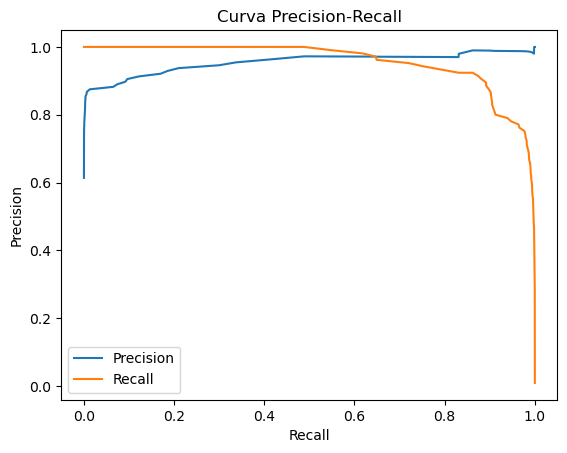

In [44]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
 
# Obtén las probabilidades de la clase positiva (generalmente la columna de índice 1)
Y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calcula la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_scores)

# Calcula el área bajo la curva Precision-Recall
pr_auc = auc(recall, precision)

# Grafica la curva Precision-Recall
plt.plot(thresholds, precision[:-1], label = 'Precision')
plt.plot(thresholds, recall[:-1], label = 'Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Curva Precision-Recall')
plt.show()


In [46]:
from sklearn.metrics import classification_report

Y_pred = Y_scores > 0.5 #Colocar 1 cuando la probabilidad es > 0.5
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 63   3]
 [  1 104]]


In [55]:
from sklearn.metrics import classification_report

Y_pred = Y_scores > 0.48 #Colocar 1 cuando la probabilidad es > 0.48
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.97      1.00      0.99       105

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 63   3]
 [  0 105]]


### Area Bajo la Curva (Area Under the Curve - AUC)

In [58]:
from sklearn.metrics import auc
print(f"auc : {auc(recall, precision)}")

auc : 0.9913918493498619


### Curva ROC

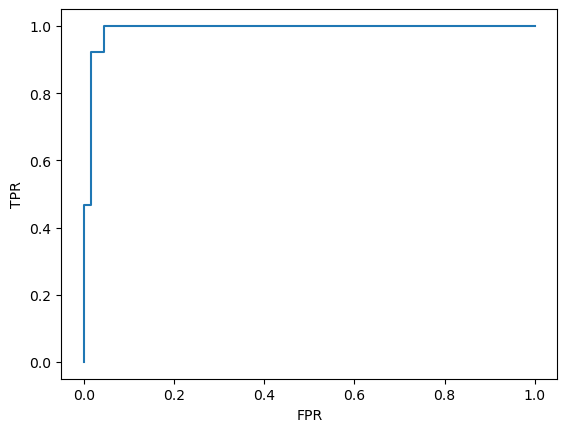

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(Y_test, Y_scores)
# ftr = tasa de falsos positivos; tpr = tasa de verdaderos positivos

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [61]:
print(f"auc : {auc(fpr, tpr)}")

auc : 0.9896103896103896
